In [1]:
import numpy as np
import pandas as pd

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')
                        
data=pd.read_csv("heart.csv")
data.head() #to display the first five rows
data.info()
data.describe().transpose()
data['thal'].unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<bound method Series.unique of 0      1
1      2
2      2
3      2
4      2
      ..
298    3
299    3
300    3
301    3
302    2
Name: thal, Length: 303, dtype: int64>

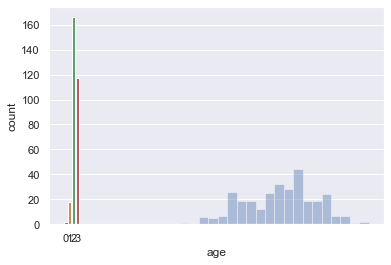

In [2]:
sns.countplot(x='thal',data=data)
data.head()
#sex,restecg,exang,slope,ca,thal
data.columns
#to check to age groups in our data set
sns.distplot(data['age'],kde=False,bins=20)
data.isnull().sum()  #no missing data
data.columns
x=data.drop('target',axis=1).values  #all columns except target
y=data['target'].values 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5) #80% is training data

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #create an instance of the function
x_train_scaled = scaler.fit_transform(x_train) #fit and tranform training data
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.transform(x_test) #only tranform test data
x_test = pd.DataFrame(x_test_scaled)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model=Sequential()
x_train.shape #13 features
from tensorflow.keras.callbacks import EarlyStopping

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [5]:
x_train.shape
# taking 13 neurons as we have 13 features
model.add(Dense(128,activation='relu',input_dim=13))
model.add(Dropout(0.25))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.25))



model.add(Dense(1,activation='sigmoid')) #output is binary values so using sigmoid function
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #use binary_crossentropy as output is binary values


In [6]:
#model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=120,epochs=250)
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=30)
model.fit(x=x_train,y=y_train,epochs=50,validation_data=(x_test,y_test),callbacks=[early_stop])
#validation data is used to check for overfitting

Epoch 1/50
8/8 [==============================] - 21s 166ms/step - loss: 0.6958 - accuracy: 0.4983 - val_loss: 0.6879 - val_accuracy: 0.6393
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6867 - accuracy: 0.5473 - val_loss: 0.6776 - val_accuracy: 0.7869
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6813 - accuracy: 0.5580 - val_loss: 0.6582 - val_accuracy: 0.6557
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6703 - accuracy: 0.6004 - val_loss: 0.6405 - val_accuracy: 0.6393
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6657 - accuracy: 0.6005 - val_loss: 0.6193 - val_accuracy: 0.7377
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6289 - accuracy: 0.6599 - val_loss: 0.5868 - val_accuracy: 0.7869
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6121 - accuracy: 0.7165 - val_loss: 0.5510 - val_accuracy: 0.8033
Epoch 8/50
8/8 [===============

In [7]:
#losses=pd.DataFrame(model.history.history)
##losses #we get loss and validation loss
#losses.plot()
#if validation loss increases then data is overfitting


In [8]:
predictions= model.predict_classes(x_test)

In [9]:
import math
from sklearn import metrics

#metrics to find accuracy of continous variables
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,predictions))
print('Mean squared value:',metrics.mean_squared_error(y_test,predictions))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('explained_variance_score:',metrics.explained_variance_score(y_test,predictions)) #1 is good value


Mean Abs value: 0.11475409836065574
Mean squared value: 0.11475409836065574
root mean squared error value: 0.3387537429470791
explained_variance_score: 0.5419354838709676


In [10]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.90      0.87      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



[[27  3]
 [ 4 27]]


In [11]:
model.save('heart.h5')

In [12]:
#import pickle
#pickle.dump(model, open('heart.pkl', 'wb'))